In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def convolve2d(image, kernel):
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

In [47]:
img = cv2.cvtColor(cv2.imread('C:\\Users\\sayak\\anaconda3\\lena_gray_512.tif'), cv2.COLOR_BGR2GRAY)
gaussianblur = convolve2d(img, kernel=np.array([[2, 4, 2], [4, 8, 4], [2, 4, 2]])/32.0)
sharpen = convolve2d(img, kernel=np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]))
edge1 = convolve2d(img, kernel=np.array([[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]]))
edge2 = convolve2d(img, kernel=np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]]))
boxblur = convolve2d(img, kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0)

Text(0.5, 1.0, 'Box Blur')

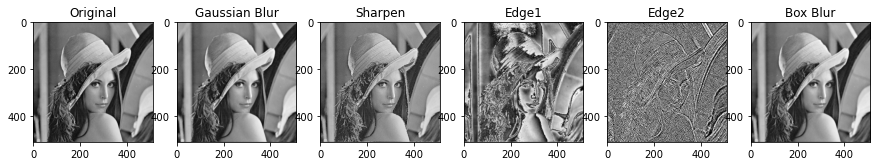

In [48]:
plt.figure(figsize=(15,15))
plt.subplot(1,6,1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1,6,2)
plt.imshow(gaussianblur, 'gray')
plt.title('Gaussian Blur')
plt.subplot(1,6,3)
plt.imshow(sharpen, 'gray')
plt.title('Sharpen')
plt.subplot(1,6,4)
plt.imshow(edge1, 'gray')
plt.title('Edge1')
plt.subplot(1,6,5)
plt.imshow(edge2, 'gray')
plt.title('Edge2')
plt.subplot(1,6,6)
plt.imshow(boxblur, 'gray')
plt.title('Box Blur')